In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [15]:
#!mkdir GloVe
#!curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
#!unzip GloVe/glove.840B.300d.zip -d GloVe/
!mkdir fastText
!curl -Lo fastText/crawl-300d-2M.vec.zip https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
!unzip fastText/crawl-300d-2M.vec.zip -d fastText/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1453M  100 1453M    0     0  4766k      0  0:05:12  0:05:12 --:--:-- 7969k     0  8:42:18  0:00:01  8:42:17 48623  6796k      0  0:03:38  0:00:21  0:03:17 8023k  7188k      0  0:03:27  0:00:32  0:02:55 7979k 0     0  7432k      0  0:03:20  0:01:33  0:01:47 4179k4  0:01:36  0:01:48 2466k 0  0:03:37  0:01:44  0:01:53 1470k2:19  0:02:03 1871k 0  5224k      0  0:04:44  0:02:40  0:02:04 3781k 0:02:00 4817k   60  877M    0     0  4964k      0  0:04:59  0:03:00  0:01:59 1914k
Archive:  fastText/crawl-300d-2M.vec.zip
  inflating: fastText/crawl-300d-2M.vec  


In [5]:
!mkdir encoder
!curl -Lo encoder/infersent1.pkl https://dl.fbaipublicfiles.com/infersent/infersent1.pkl
!curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146M  100  146M    0     0  4797k      0  0:00:31  0:00:31 --:--:-- 8064k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146M  100  146M    0     0  6380k      0  0:00:23  0:00:23 --:--:-- 6993k   0     0  50824      0  0:50:30  0:00:01  0:50:29 50796


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ravitiwari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install torchvision 

In [3]:
import torch

In [6]:
from models import InferSent
V = 2
MODEL_PATH = 'encoder/infersent%s.pkl' % V
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
infersent = InferSent(params_model)
infersent.load_state_dict(torch.load(MODEL_PATH))

<All keys matched successfully>

In [7]:
W2V_PATH = 'fastText/crawl-300d-2M.vec'
infersent.set_w2v_path(W2V_PATH)

In [8]:
data=pd.read_csv("DATASET_Preprocessed_new_data.csv")
data

,Unnamed: 0,tweet,label
0,0,a a woman you should not complain about cleani...,2
1,1,boy dat cold tyga dwn bad for cuffin dat hoe i...,1
2,2,dawg you ever fuck a bitch and she sta to cry ...,1
3,3,she look like a tranny,1
4,4,the shit you hear about me might be true or it...,1
...,...,...,...
57432,57432,plan to whore out my sexy bitch tomorrow night...,2
57433,57433,bitch dude i did not even bother to read the w...,2
57434,57434,calling them is hea le therfore i will not cal...,2
57435,57435,silly killary wannabe and number just keep cli...,2


In [9]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,tweet,label
0,a a woman you should not complain about cleani...,2
1,boy dat cold tyga dwn bad for cuffin dat hoe i...,1
2,dawg you ever fuck a bitch and she sta to cry ...,1
3,she look like a tranny,1
4,the shit you hear about me might be true or it...,1
...,...,...
57432,plan to whore out my sexy bitch tomorrow night...,2
57433,bitch dude i did not even bother to read the w...,2
57434,calling them is hea le therfore i will not cal...,2
57435,silly killary wannabe and number just keep cli...,2


In [10]:
data.dropna(inplace=True)
data.shape

(57367, 2)

In [11]:
data.label.value_counts()

1    26531
2    20562
0     8160
3     2114
Name: label, dtype: int64

In [12]:
y=data['label']
x=data['tweet']

## Spliting the Dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)


print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)


(43025,) (43025,)
(14342,) (14342,)


## Building Vocab of 100000 words

In [16]:
infersent.build_vocab_k_words(K=100000)

Vocab size : 100000


In [17]:
%%time
X_train_tweet = infersent.encode(X_train, tokenize=True)
print("X_Train Done")
print("="*180)

X_test_tweet = infersent.encode(X_test, tokenize=True)

print("After Embedding vectorizations")
print(X_train_tweet.shape, y_train.shape)

print(X_test_tweet.shape, y_test.shape)
print("="*100)

/Users/ravitiwari/Desktop/Pulp_fiction/Models/models.py:207: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sentences = np.array(sentences)[idx_sort]


X_Train Done
After Embedding vectorizations
(43025, 4096) (43025,)
(14342, 4096) (14342,)
CPU times: user 37min 38s, sys: 30.4 s, total: 38min 8s
Wall time: 1h 5min 24s


In [25]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [19]:
def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print("="*80)
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    print("="*80)
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

In [20]:
labels_=['hatefull','offensive','neither','Tobacco']

# With Class_Weights

In [21]:
weights={0:0.259068,1:0.079680,2:0.102811,3:1}

In [22]:
data.label.value_counts()

1    26531
2    20562
0     8160
3     2114
Name: label, dtype: int64

Start training...done!
Start testing...done!
accuracy: 0.687212383210152
              precision    recall  f1-score   support

    hatefull       0.39      0.58      0.47      2040
   offensive       0.83      0.68      0.75      6633
     neither       0.69      0.71      0.70      5141
     Tobacco       0.89      0.97      0.93       528

    accuracy                           0.69     14342
   macro avg       0.70      0.73      0.71     14342
weighted avg       0.72      0.69      0.70     14342



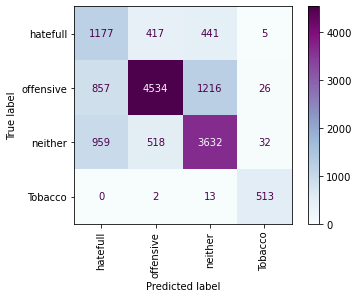

In [23]:
log_model=LogisticRegression(penalty='l2',max_iter=1000,class_weight=weights)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.7032491981592526
              precision    recall  f1-score   support

    hatefull       0.43      0.45      0.44      2040
   offensive       0.80      0.74      0.77      6633
     neither       0.68      0.73      0.70      5141
     Tobacco       0.87      0.98      0.92       528

    accuracy                           0.70     14342
   macro avg       0.70      0.72      0.71     14342
weighted avg       0.71      0.70      0.70     14342



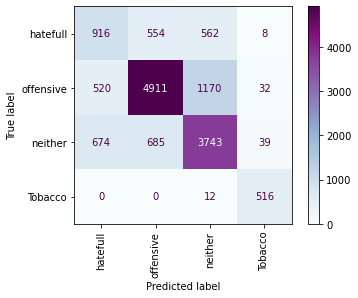

In [24]:
svm = LinearSVC(class_weight=weights, verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet, X_test_tweet, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")